In [6]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

Генеруємо дані

In [7]:
N = 10000
x = np.linspace(0, 10, N)
data = np.sin(x / 5) + 0.1 * np.random.randn(N)

Перетворюємо дані у формат PyTorch

In [8]:
data_tensor = torch.Tensor(data).view(-1, 1, 1)

Визначаємо архітектуру мережі

In [9]:
class BiRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(BiRNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, bidirectional=True)
        self.fc = nn.Linear(hidden_size * 2, output_size)

    def forward(self, x):
        batch_size = x.size(1)
        h0 = torch.zeros(2, batch_size, self.hidden_size)  # Початковий стан прихованого шару
        out, _ = self.rnn(x, h0)
        out = self.fc(out[-1])  # Використовуємо останній вихід з обох напрямів
        return out

Параметри моделі

In [10]:
input_size = 1
hidden_size = 64
output_size = 1

Ініціалізуємо модель, функцію втрат та оптимізатор

In [11]:
model = BiRNN(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Тренуємо модель

In [12]:
with torch.no_grad():
    predicted = model(data_tensor).numpy()

Виводимо графік порівняння оригінальних даних з передбаченими

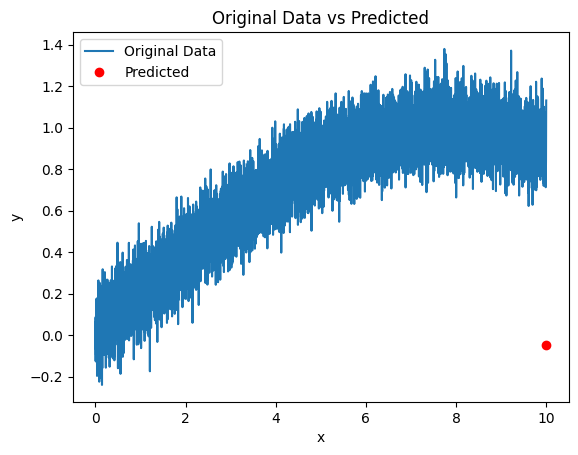

In [13]:
plt.plot(x, data, label='Original Data')
plt.plot(x[-1], predicted.squeeze(), 'ro', label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Original Data vs Predicted')
plt.legend()
plt.show()